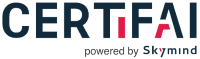

Copyright (c) 2021 CertifAI Sdn. Bhd.

This program is part of OSRFramework. You can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program. If not, see http://www.gnu.org/licenses/.


INSTRUCTION: Follow the steps in the commented line for each section and run the code.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [ ]:
# ================================================================== #
#                         Table of Contents                          #
# ================================================================== #

# 1. Basic autograd example 1               (Line 25 to 39)
# 2. Basic autograd example 2               (Line 46 to 83)
# 3. Loading data from numpy                (Line 90 to 97)
# 4. Input pipline                          (Line 104 to 129)
# 5. Input pipline for custom dataset       (Line 136 to 156)
# 6. Pretrained model                       (Line 163 to 176)
# 7. Save and load model                    (Line 183 to 189)

In [ ]:
# ================================================================== #
#                     1. Basic autograd example 1                    #
# ================================================================== #

# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b  # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)  # x.grad = 2
print(w.grad)  # w.grad = 1
print(b.grad)  # b.grad = 1

In [ ]:
# ================================================================== #
#                    2. Basic autograd example 2                     #
# ================================================================== #

# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

In [ ]:
# ================================================================== #
#                     3. Loading data from numpy                     #
# ================================================================== #

# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

In [ ]:
# ================================================================== #
#                         4. Input pipeline                           #
# ================================================================== #

# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../../resources/day_06',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print(image.size())
print(label)

# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

In [ ]:
# ================================================================== #
#                5. Input pipeline for custom dataset                 #
# ================================================================== #

# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names.
        pass

    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass

    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0

    # You can then use the prebuilt data loader.


custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [ ]:
# ================================================================== #
#                        6. Pretrained model                         #
# ================================================================== #

# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print(outputs.size())  # (64, 100)

In [ ]:
# ================================================================== #
#                      7. Save and load the model                    #
# ================================================================== #

# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))